#### Handling Outliers-----> 
##### Outliers ====> outliers are the data points  significatly differ from the majority of dataset and lie far away from the normal distribution.

### How to handle the outliers----> 
#### 1. Trimming -----> it technique in which we handle outliers by removing the data points that are grater than the upper limit or lower than the lower limit.

#### 2.Capping ------> It is technique in which we handle outliers by extending the range of data so that the outliers will also be the data points that lie in the range.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("C:\\Users\\HARSHITA\\Downloads\\Data_sets\\insurance - insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [25]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [26]:
# First we get percentile25 and percentile75

In [27]:
percentile25=df['charges'].quantile(0.25)
percentile25

np.float64(4740.28715)

In [28]:
percentile75=df['charges'].quantile(0.75)
percentile75

np.float64(16639.912515)

In [29]:
# IQR---->(INTERQUARTILE RANGE) ===> 
# It reapresents the range in which the 50% data lies.
# used--->
# 1. to detect Outliers
# 2. to understand data variabilty

In [30]:
IQR=percentile75-percentile25
IQR

np.float64(11899.625365)

In [31]:
Upper_limit= percentile75+1.5*IQR
Upper_limit

np.float64(34489.350562499996)

In [32]:
Lower_limit=percentile25-1.5*IQR
Lower_limit

np.float64(-13109.1508975)

In [33]:
# Now will know about the outliers by the boxplot

<Axes: xlabel='charges'>

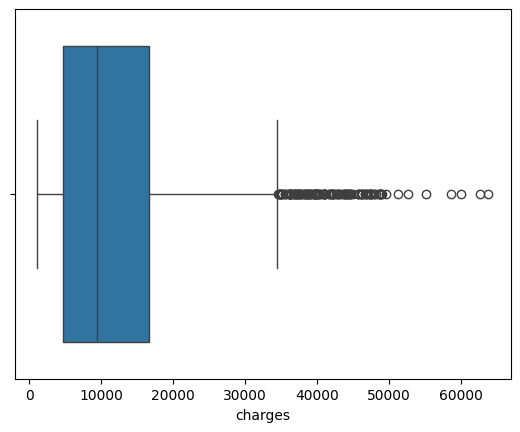

In [34]:
sns.boxplot(x=df['charges'])

In [36]:
# If we want to all columns of the outliers full info

In [38]:
df[df['charges']>Upper_limit]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [39]:
df[df['charges']<Lower_limit]

,age,sex,bmi,children,smoker,region,charges


#### NOW HANDLING THE OUTLIERS 
#### ----------------------------------------------1. TRIMMING-----------------------------------------------------------------------

In [43]:
# WE WILL MAKE NEW DATASET WHICH IS ONLY LIE LESS THAN LOWER LIMIT.

In [47]:
new_df=df[df['charges']<Upper_limit]

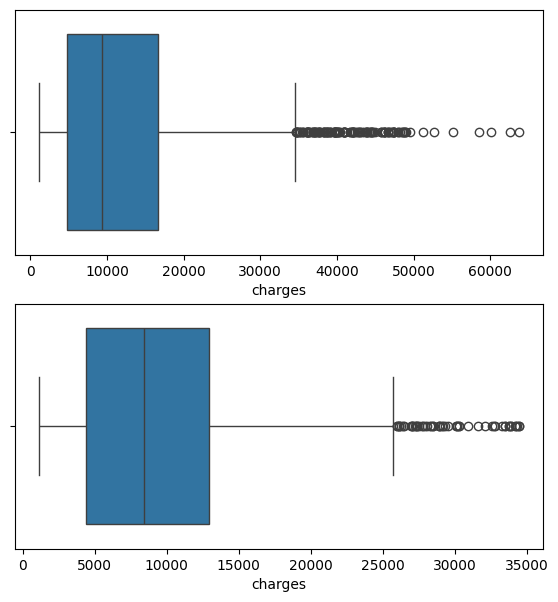

In [48]:
plt.figure(figsize=(15,7))
plt.subplot(222)
sns.boxplot(x=df['charges'])

plt.subplot(224)
sns.boxplot(x=new_df['charges'])
plt.show()

#### ------------------------------------------------2. CAPPING -----------------------------------------------------------------------

In [49]:
newdf=df.copy()

In [50]:
newdf['charges']=newdf['charges'].clip(lower=Lower_limit,upper=Upper_limit)

In [ ]:
newdf['charges']=np.where(newdf['charges']>Upper_limit,Upper_limit,
                          np.where(newdf['charges']<Lower_limit,Lower_limit,
                          newdf['charges']))

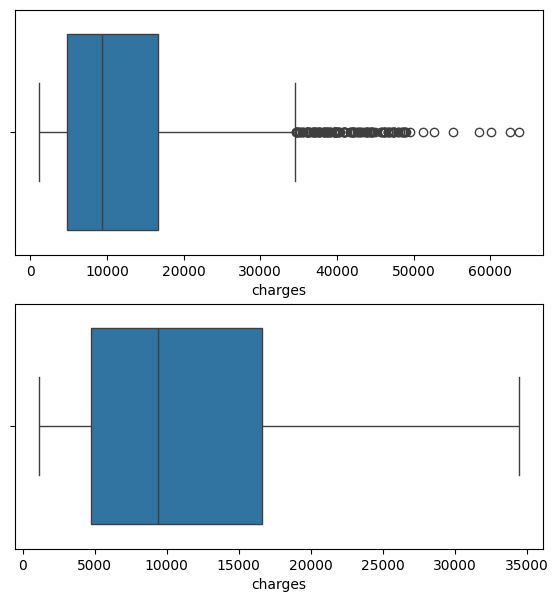

In [51]:
plt.figure(figsize=(15,7))
plt.subplot(222)
sns.boxplot(x=df['charges'])

plt.subplot(224)
sns.boxplot(x=newdf['charges'])
plt.show()
